In [82]:
import pandas as pd
import seaborn as sns
import numpy as np

import ast

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

In [83]:
# _columns.csv
columns_data = pd.read_csv("archive/_columns.csv")
columns_data

,ColumnName,ColumnDescription
0,Address,website address the data is scraped from \n
1,League,League or Tournament the match took place in \n
2,Year,Year the match took place in \n
3,Season,Spring or Summer depending on which half of th...
4,Type,"Season, Playoffs, Regional, or International m..."
5,blueTeamTag,Blue Team's tag name (ex. Team SoloMid is TSM...
6,bResult,Result of the match for Blue Team - 1 is a wi...
7,rResult,Result of the match for Red Team - 1 is a win...
8,redTeamTag,Red Team's Tag Name (ex. Team SoloMid is TSM) \n
9,gamelength,Game length in minutes \n


In [84]:
# LeagueofLegends.csv
# Correlacionar o tempo medio das partida com os campeo
# Definir bem as hipoteses
# Explicar bem a analise
# Diversificar tipos de plots - Contribuir com a analise

lol_data = pd.read_csv("archive/LeagueofLegends.csv")
lol_data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,goldblue,bKills,bTowers,bInhibs,bDragons,bBarons,bHeralds,goldred,rKills,rTowers,rInhibs,rDragons,rBarons,rHeralds,blueTop,blueTopChamp,goldblueTop,blueJungle,blueJungleChamp,goldblueJungle,blueMiddle,blueMiddleChamp,goldblueMiddle,blueADC,blueADCChamp,goldblueADC,blueSupport,blueSupportChamp,goldblueSupport,blueBans,redTop,redTopChamp,goldredTop,redJungle,redJungleChamp,goldredJungle,redMiddle,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...","[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...","[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...","[[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...","[[36.686, 'MID_LANE'], [29.274, 'MID_LANE']]","[[37.267, None]]",[],[],"[2415, 2415, 2725, 3952, 5336, 6602, 7900, 945...","[[16.529, 'TSM Lustboy', 'C9 Balls', ['C9 Mete...","[[39.23, 'TOP_LANE', 'INNER_TURRET'], [20.681,...",[],"[[17.14, None], [30.934, None], [24.641, None]]",[[29.954]],[],Dyrus,Irelia,"[475, 475, 532, 687, 893, 1058, 1172, 1471, 18...",Santorin,RekSai,"[475, 475, 532, 870, 1049, 1276, 1596, 1815, 2...",Bjergsen,Ahri,"[475, 475, 532, 807, 1102, 1307, 1651, 1950, 2...",WildTurtle,Jinx,"[475, 475, 532, 797, 1127, 1453, 1766, 2044, 2...",Lustboy,Janna,"[515, 515, 583, 726, 897, 1077, 1227, 1381, 15...","['Rumble', 'Kassadin', 'Lissandra']",Balls,Gnar,"[475, 475, 532, 728, 958, 1284, 1526, 1912, 21...",Meteos,Elise,"[475, 475, 532, 898, 1192, 1429, 1819, 2107, 2...",Hai,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...","[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...","[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...","[[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...",[],"[[32.545, None], [26.177, None], [19.119, None]]",[[29.255]],[],"[2415, 2415, 2731, 4126, 5364, 6560, 7789, 893...","[[12.387, 'CST Jesiz', 'DIG Gamsu', ['DIG Ship...","[[19.257, 'MID_LANE', 'OUTER_TURRET'], [15.206...","[[36.813, 'MID_LANE']]","[[12.264, None]]",[],[],Cris,Gnar,"[475, 475, 532, 791, 1127, 1509, 1674, 1875, 2...",Impaler,Rengar,"[475, 475, 532, 895, 1176, 1334, 1447, 1859, 2...",Jesiz,Ahri,"[475, 475, 532, 816, 1102, 1413, 1624, 1937, 2...",Mash,Caitlyn,"[475, 475, 532, 856, 1182, 1468, 1653, 1890, 2...",Sheep,Leona,"[515, 515, 577, 750, 924, 1073, 1239, 1392, 15...","['Kassadin', 'Sivir', 'Lissandra']",Gamsu,Irelia,"[475, 475, 532, 811, 1042, 1237, 1625, 1852, 2...",Crumbzz,JarvanIV,"[475, 475, 532, 909, 1105, 1423, 1536, 1732, 1...",Shiphtur,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...","[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...","[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...","[[15.045, 'BOT_LANE', 'OUTER_TURRET'], [39.566...","[[37.511, 'TOP_LANE'], [37.38, 'BOT_LANE'], [3...","[[24.577, None], [37.867, None], [30.87, None]...",[[35.144]],[],"[2415, 2415, 2716, 3854, 4899, 6199, 7520, 859...","[[8.449, 'WFX Altec', 'GV Cop', ['GV BunnyFuFu...","[[24.62, 'MID_LANE', 'OUTER_TURRET'], [30.493,...",[],[],[],[],Flaresz,Renekton,"[475, 475, 533, 673, 828, 1075, 1428, 1775, 21...",ShorterACE,Rengar,"[475, 475, 543, 836, 1041, 1261, 1568, 2002, 2...",Pobelter,Fizz,"[475, 475, 533, 756, 1065, 1368, 2056, 2237, 2...",Altec,Sivir,"[475, 475, 533, 811, 1130

In [85]:
# bans.csv

# Address - website address the data is scraped from
# Team - 'blueBans' or 'redBans'
# ban_1 ... ban_5 - banned champion

bans_data = pd.read_csv("archive/bans.csv")
bans_data.head()

,Address,Team,ban_1,ban_2,ban_3,ban_4,ban_5
0,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Rumble,Kassadin,Lissandra,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Kassadin,Sivir,Lissandra,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,JarvanIV,Lissandra,Kassadin,NaN,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Annie,Lissandra,Kassadin,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Irelia,Pantheon,Kassadin,NaN,NaN


In [86]:
# gold.csv

# Address - website address the data is scraped from
# Type - ['golddiff' 'goldblue' 'goldred' 'goldblueTop' 'goldblueJungle'
# 'goldblueMiddle' 'goldblueADC' 'goldblueSupport' 'goldredTop'
# 'goldredJungle' 'goldredMiddle' 'goldredADC' 'goldredSupport']
# min_1 ... min_95 - game time register

gold_data = pd.read_csv("archive/gold.csv")
gold_data.head()

,Address,Type,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80,min_81,min_82,min_83,min_84,min_85,min_86,min_87,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-14,-65,-268,-431,-488,-789,-494,-625,-1044,-313,-760,-697,-790,-611,240,845.0,797.0,1422.0,987.0,169.0,432.0,491.0,1205.0,1527.0,1647.0,1847.0,3750.0,4719.0,3561.0,3367.0,2886.0,2906.0,4411.0,4473.0,4639.0,4762.0,4686.0,6057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-26,-18,147,237,-152,18,88,-242,102,117,802,1420,1394,1301,1489,1563.0,1368.0,1105.0,205.0,192.0,587.0,377.0,667.0,415.0,1876.0,1244.0,2130.0,2431.0,680.0,1520.0,949.0,1894.0,2644.0,3394.0,3726.0,1165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,10,-60,34,37,589,1064,1258,913,1233,1597,1575,3046,2922,3074,3626,3466.0,5634.0,5293.0,4597.0,4360.0,4616.0,4489.0,4880.0,5865.0,6993.0,7049.0,7029.0,7047.0,7160.0,7081.0,7582.0,9917.0,10337.0,9823.0,12307.0,13201.0,13924.0,13915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-15,25,228,-6,-243,175,-346,16,-258,-57,-190,-111,-335,-8,324,428.0,-124.0,768.0,2712.0,1813.0,198.0,1242.0,1245.0,1278.0,1240.0,-664.0,-1195.0,-1157.0,-2161.0,-2504.0,-3873.0,-3688.0,-3801.0,-3668.0,-3612.0,-5071.0,-2825.0,-1464.0,-4507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,40,40,44,-36,113,158,-121,-191,23,205,156,272,-271,-896,-574,177,-425,-730.0,-318.0,478.0,926.0,761.0,-286.0,473.0,490.0,1265.0,2526.0,3890.0,4319.0,5121.0,5140.0,5141.0,6866.0,9517.0,11322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# kills.csv
kills_data = pd.read_csv("archive/kills.csv")
kills_data.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643


In [88]:
# matchinfo.csv
matchinfo_data = pd.read_csv("archive/matchinfo.csv")
matchinfo_data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [89]:
# monsters.csv
monsters_data = pd.read_csv("archive/monsters.csv")
monsters_data.head()

,Address,Team,Time,Type
0,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,37.267,DRAGON
1,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,32.545,DRAGON
2,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,26.177,DRAGON
3,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,19.119,DRAGON
4,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,24.577,DRAGON


In [90]:
# structures.csv
structures_data = pd.read_csv("archive/structures.csv")
structures_data.head()

,Address,Team,Time,Lane,Type
0,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,27.542,MID_LANE,BASE_TURRET
1,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,39.269,MID_LANE,NEXUS_TURRET
2,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.583,BOT_LANE,INNER_TURRET
3,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,23.038,TOP_LANE,INNER_TURRET
4,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,16.556,BOT_LANE,OUTER_TURRET


## Campeões mais pickados por line de cada ano

columns_to_filter = ['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult', 'redTeamTag',
                     'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons',
                     'bHeralds', 'goldred', 'rKills', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds',
                     'blueTop', 'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp', 'goldblueJungle',
                     'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle', 'blueADC', 'blueADCChamp', 'goldblueADC',
                     'blueSupport', 'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop', 'redTopChamp',
                     'goldredTop', 'redJungle', 'redJungleChamp', 'goldredJungle', 'redMiddle', 'redMiddleChamp',
                     'goldredMiddle', 'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
                     'goldredSupport', 'redBans', 'Address']

In [91]:
# Anos disponiveis

years = lol_data['Year'].unique()
ligas = lol_data['League'].unique()

years.sort()
print(years)
print(ligas)

[2014 2015 2016 2017 2018]
['NALCS' 'EULCS' 'LCK' 'LMS' 'CBLoL' 'TCL' 'OPL' 'CLS' 'LLN' 'LJL' 'LCL'
 'WC' 'MSI' 'IEM' 'RR']


In [92]:
columns_to_filter = ['League', 'Year',
                     'blueMiddleChamp', 'blueADCChamp', 'blueSupportChamp', 'blueTopChamp', 'blueJungleChamp',
                     'redMiddleChamp',  'redADCChamp',  'redSupportChamp',  'redTopChamp',  'redJungleChamp',
                     'Address']

champions_df = lol_data[columns_to_filter]

champions_df.head()

,League,Year,blueMiddleChamp,blueADCChamp,blueSupportChamp,blueTopChamp,blueJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp,redTopChamp,redJungleChamp,Address
0,NALCS,2015,Ahri,Jinx,Janna,Irelia,RekSai,Fizz,Sivir,Thresh,Gnar,Elise,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Ahri,Caitlyn,Leona,Gnar,Rengar,Azir,Corki,Annie,Irelia,JarvanIV,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Fizz,Sivir,Annie,Renekton,Rengar,Azir,Corki,Janna,Sion,LeeSin,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Leblanc,Sivir,Thresh,Irelia,JarvanIV,Lulu,KogMaw,Janna,Gnar,Nunu,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Lissandra,Tristana,Janna,Gnar,JarvanIV,Lulu,Corki,Annie,Sion,RekSai,http://matchhistory.na.leagueoflegends.com/en/...


In [93]:
years = [2014,2015,2016,2017,2018]

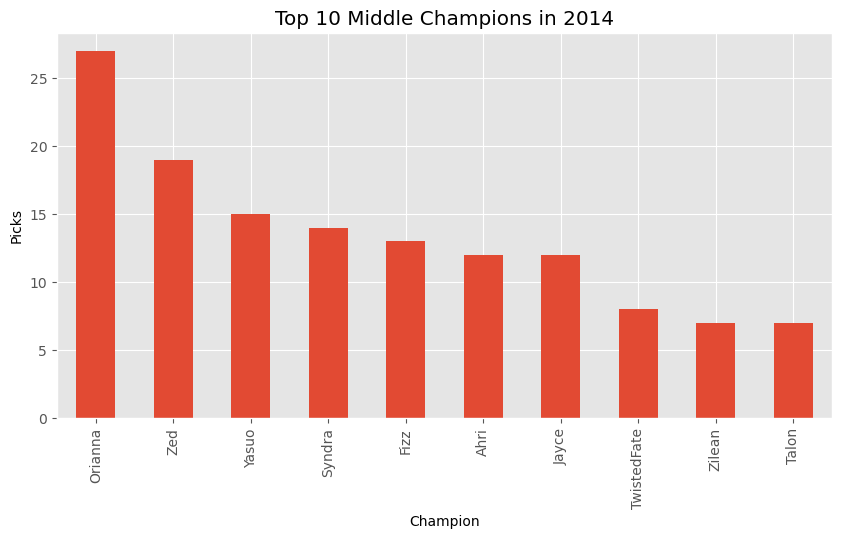

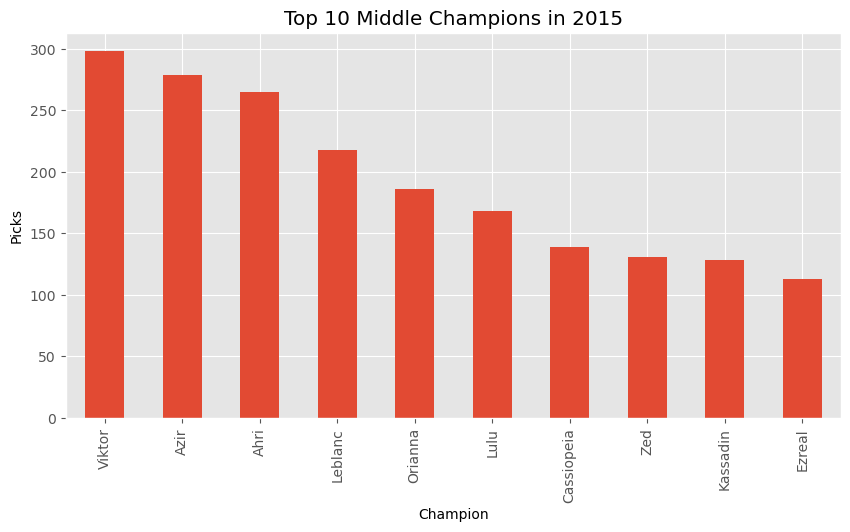

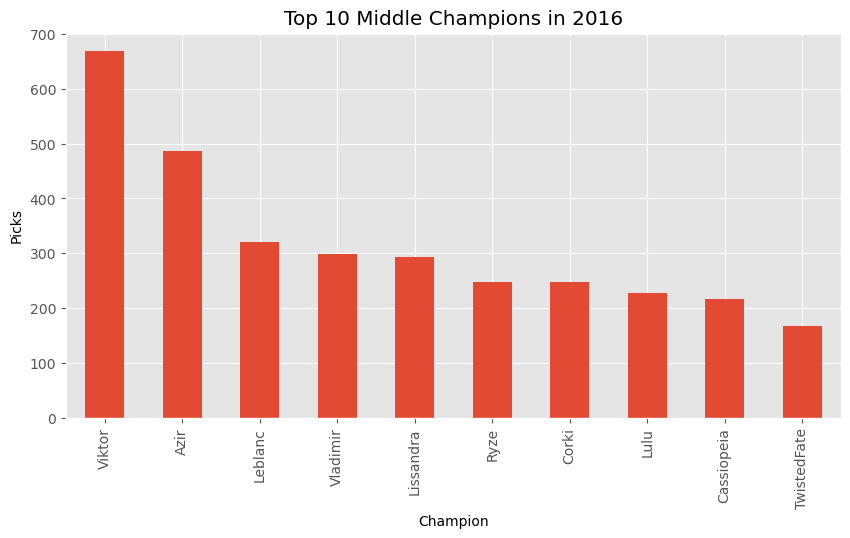

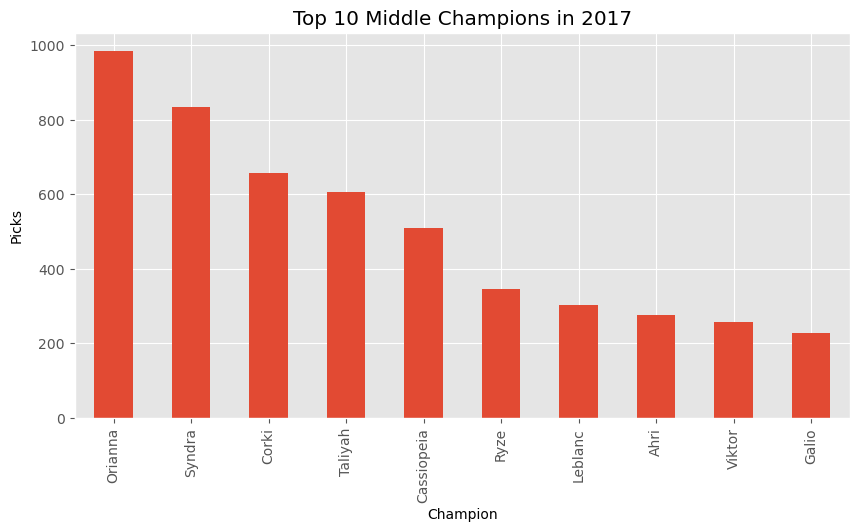

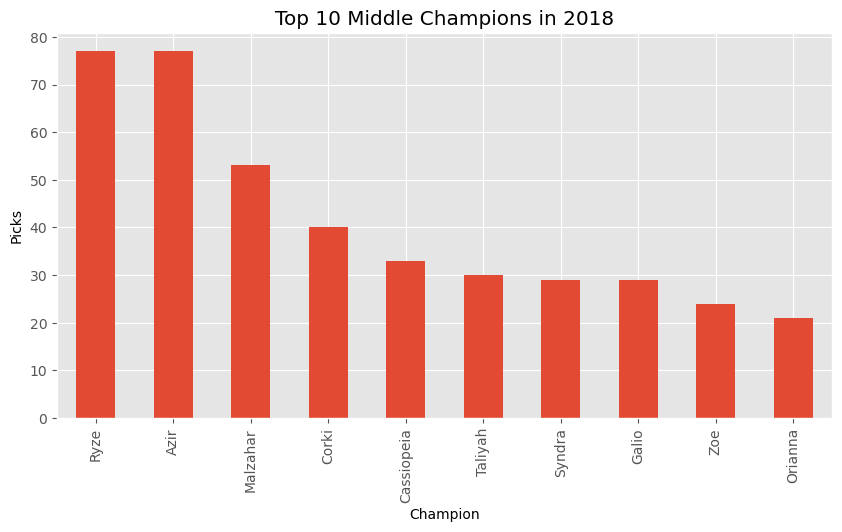

In [94]:
role = 'Middle'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    # Get data for the chosen year and role
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    # Get the top 10 champions
    top_champions = data.value_counts().nlargest(10)

    # Plot histogram
    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()
    

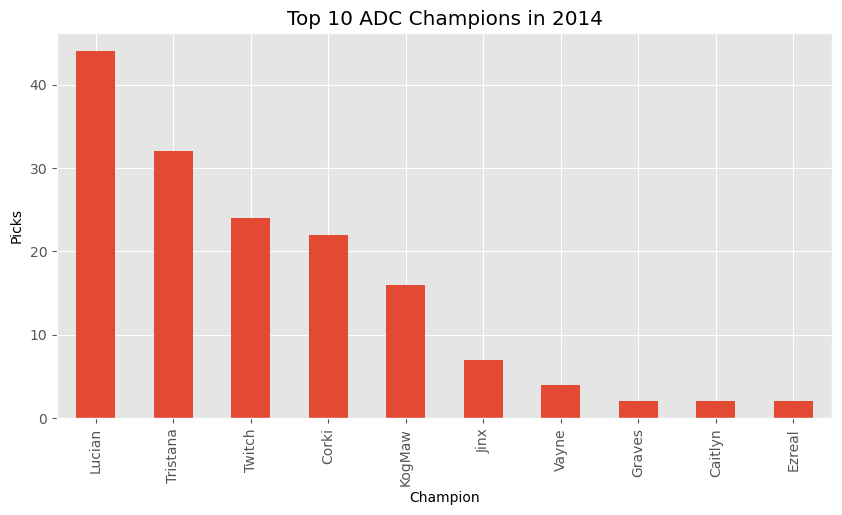

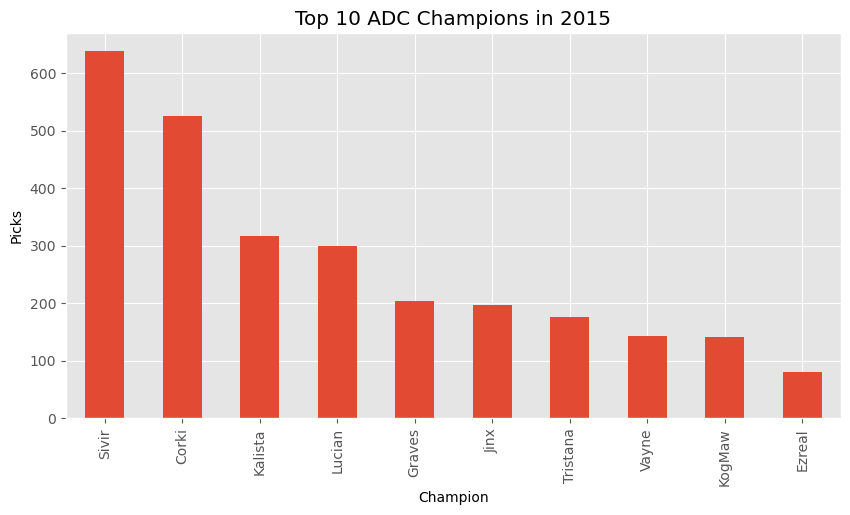

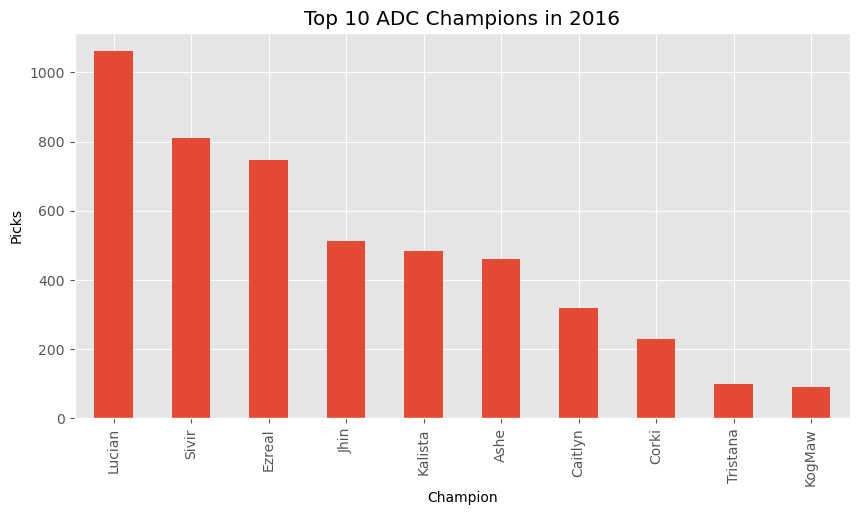

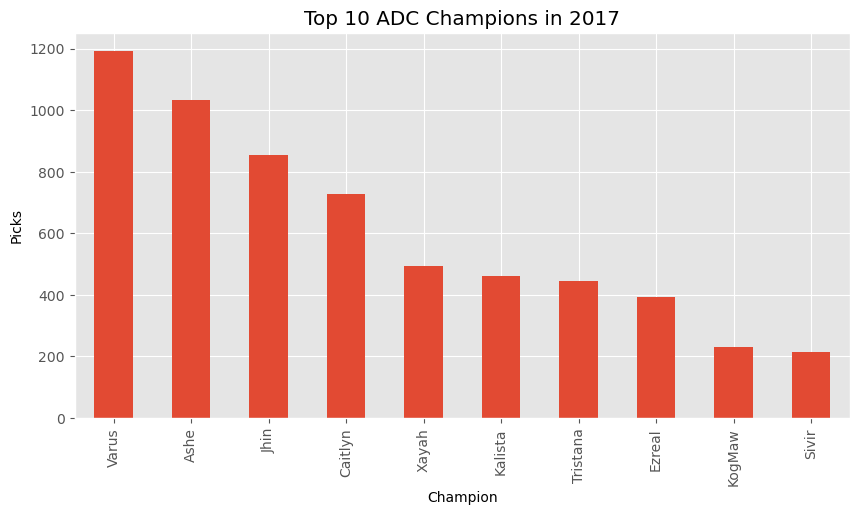

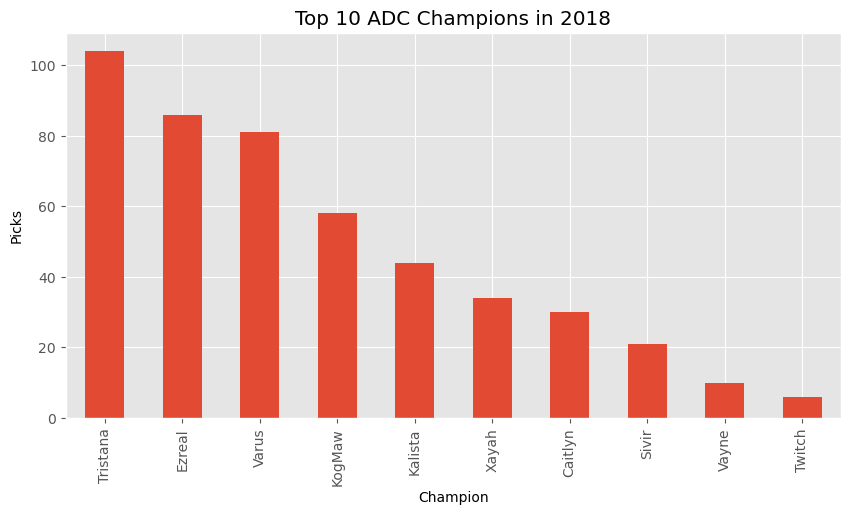

In [95]:
role = 'ADC'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    # Get data for the chosen year and role
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    # Get the top 10 champions
    top_champions = data.value_counts().nlargest(10)

    # Plot histogram
    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

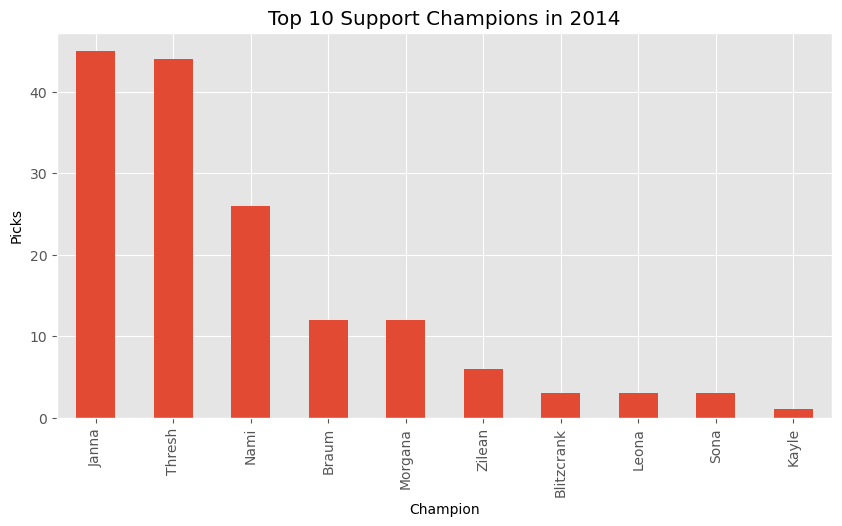

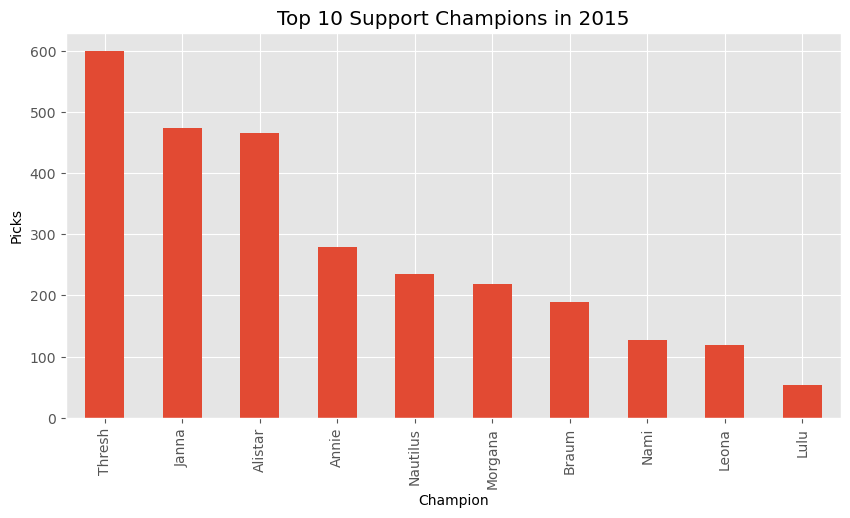

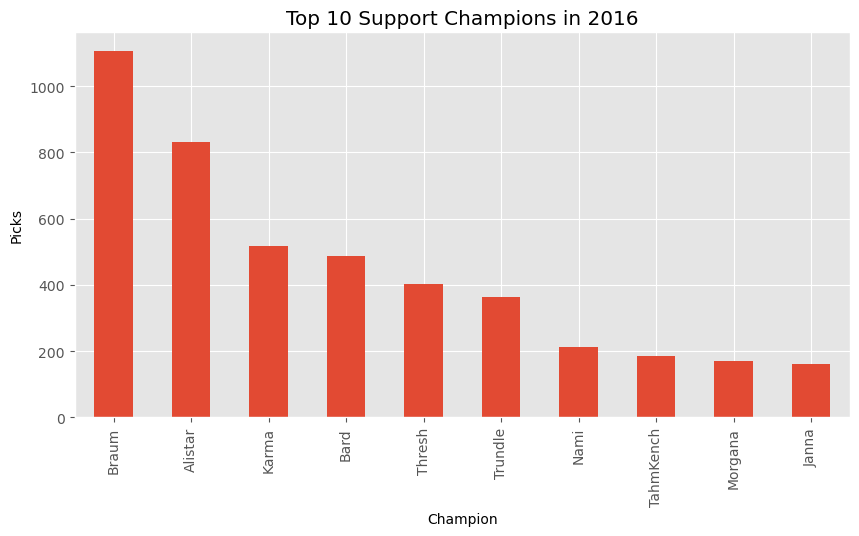

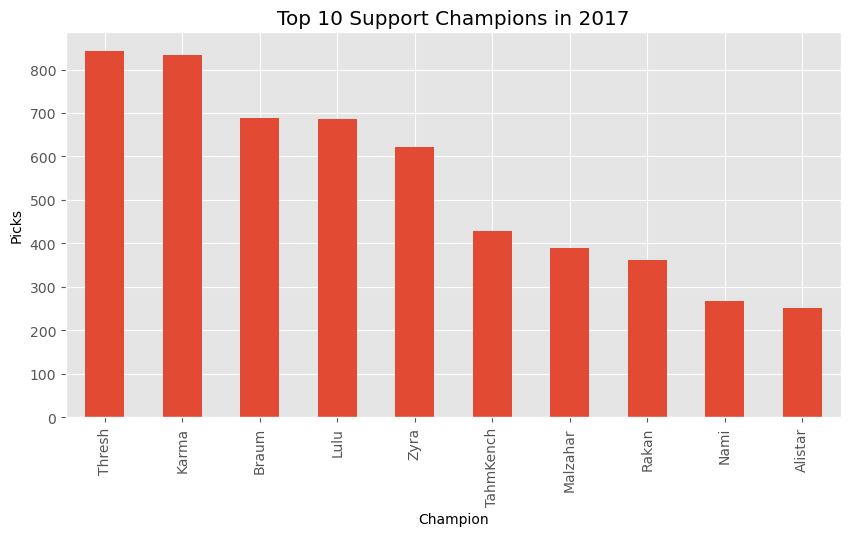

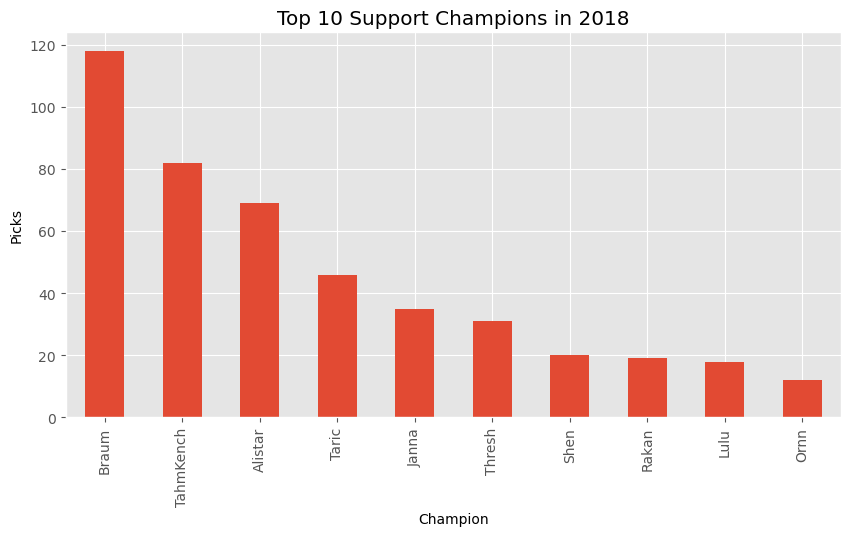

In [96]:
role = 'Support'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    # Get data for the chosen year and role
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    # Get the top 10 champions
    top_champions = data.value_counts().nlargest(10)

    # Plot histogram
    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

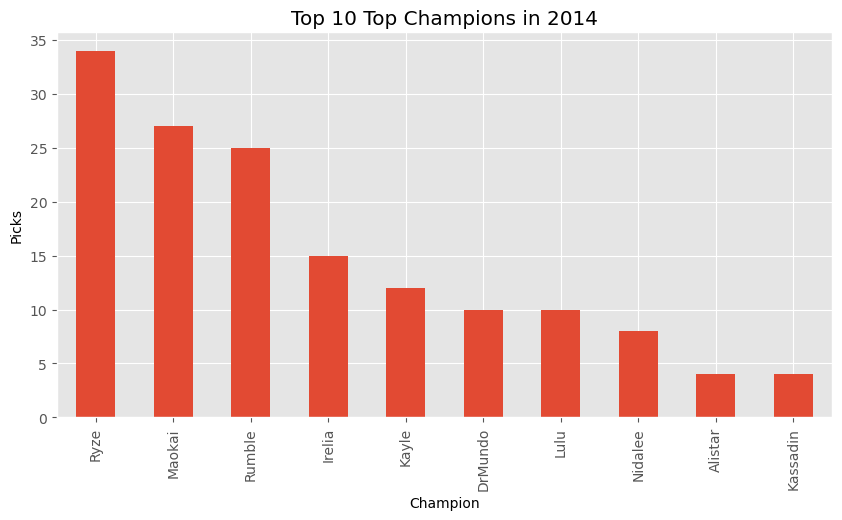

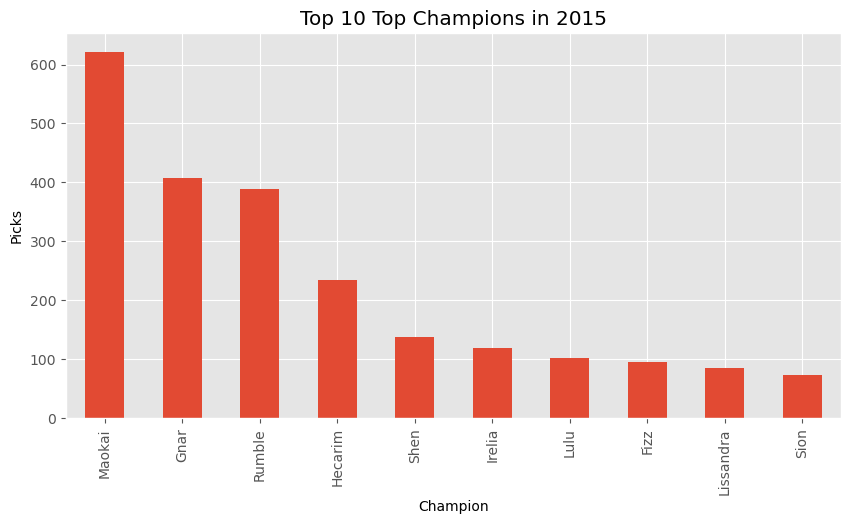

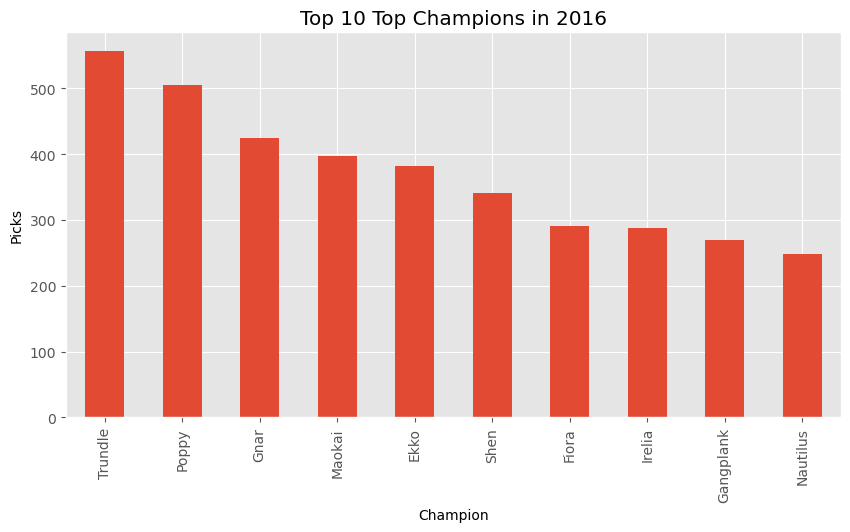

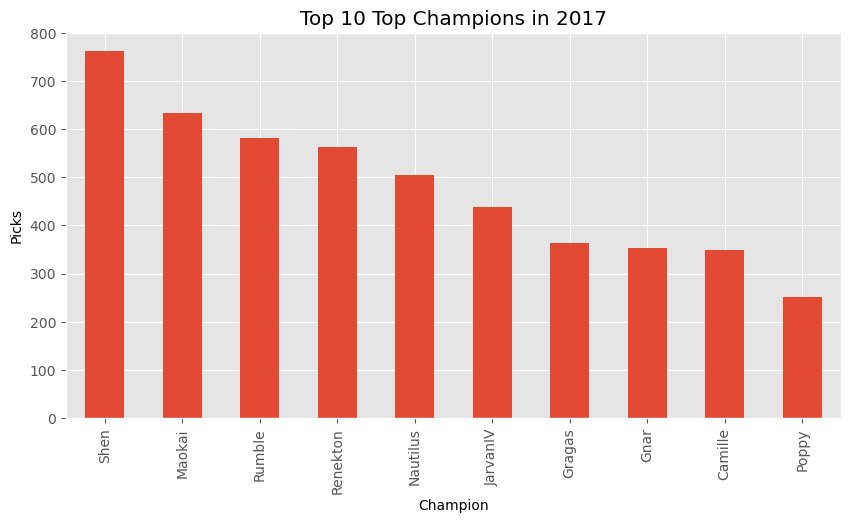

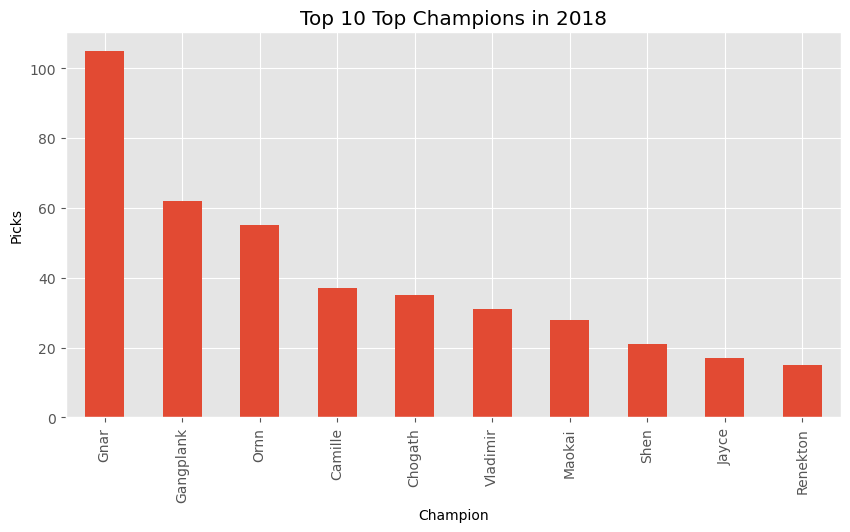

In [97]:
role = 'Top'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    top_champions = data.value_counts().nlargest(10)

    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

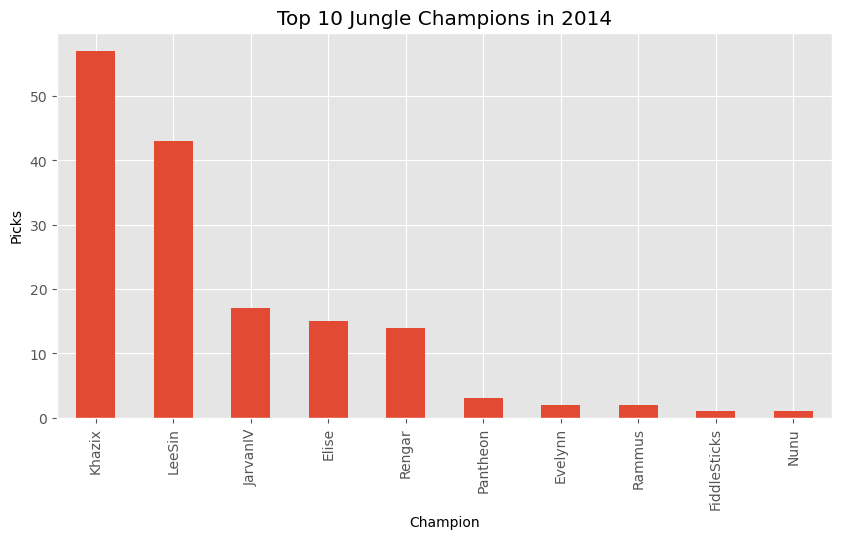

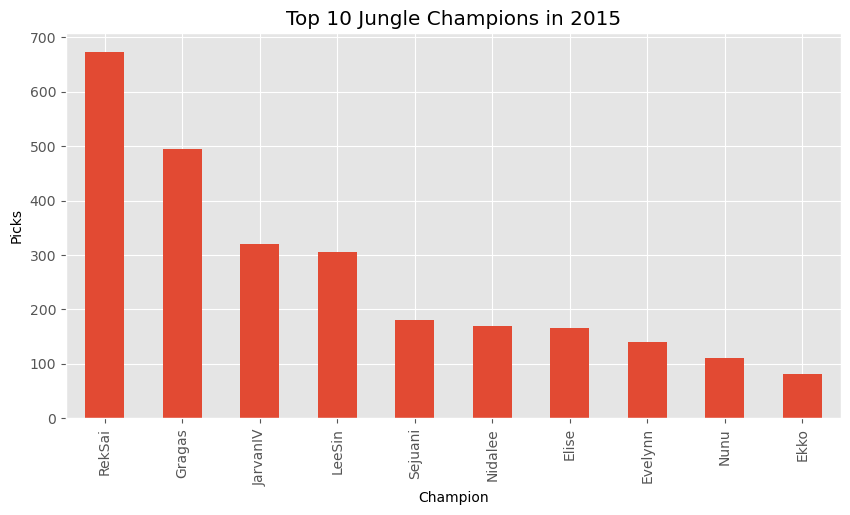

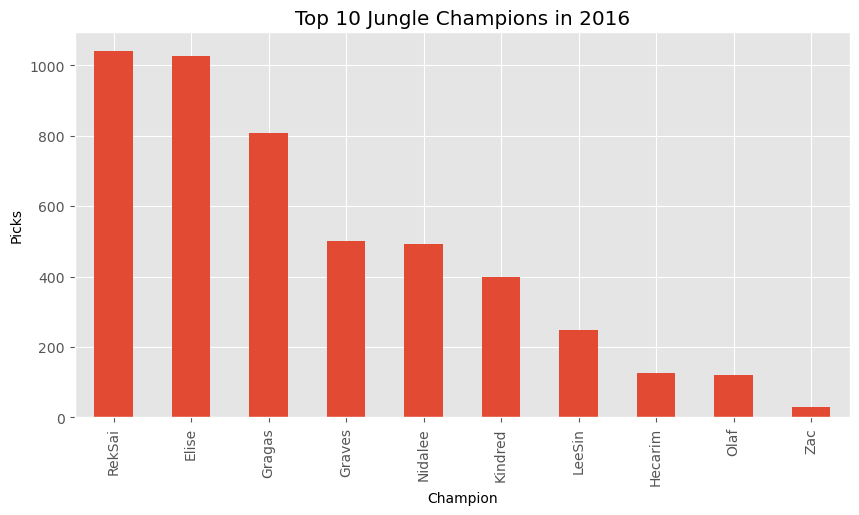

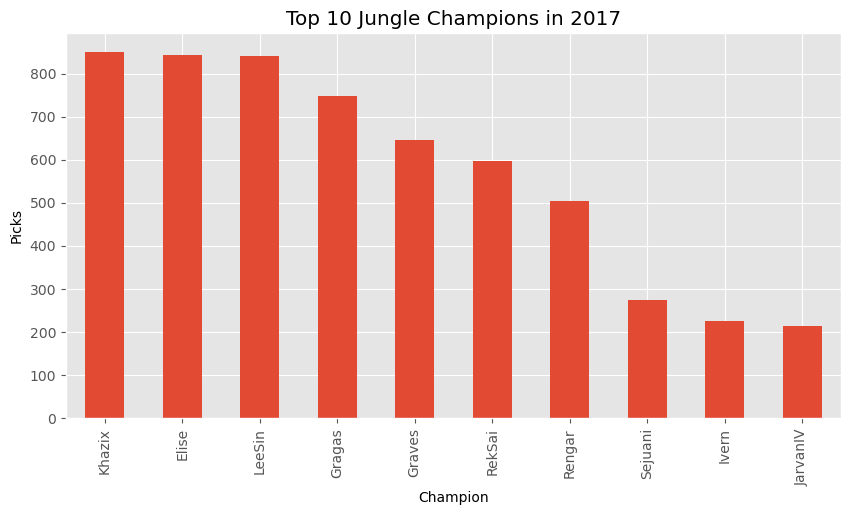

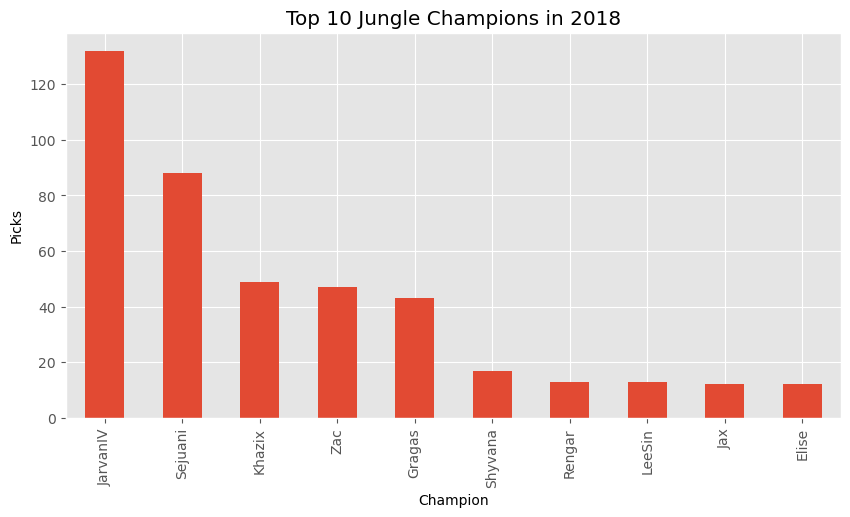

In [98]:
role = 'Jungle'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    top_champions = data.value_counts().nlargest(10)

    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

## Hipotese 1: O League Of Legends vem se tornando um jogo cada vez mais acelerado.

Como jogador desde 2015, tenho a impressão de que a cada ano que passa a Riot Games ( empresa responsável pelo LOL ) realiza mudanças no jogo que o tornam cada vez mais acelerado.


## Hipotese 2: O Blue Side é o lado mais fácil de jogar no League of Legends.

Jogo o jogo a quase 10 anos e sempre existiu a discussão de qual lado é o mais facil de se jogar. Por conta de algumas questões de controle da camera do jogo, o lado azul aparenta ser mais intuitivo de se jogar! Mas existem outros fatores que podem impactar nessa percepção e é isso que estou buscando entender.


### Analisando qual o lado tem mais vitórias ao longo dos anos em todas as ligas competitivas

In [99]:
# Filtrar apenas as colunas relevantes
columns_to_filter = ['League', 'Year', 'bResult', 'rResult']
filtered_data = lol_data[columns_to_filter]

# Calcular o número total de vitórias para cada lado
blue_wins = filtered_data[filtered_data['bResult'] == 1].groupby('Year').size().reset_index(name='BlueWins')
red_wins = filtered_data[filtered_data['rResult'] == 1].groupby('Year').size().reset_index(name='RedWins')

# Mesclar os resultados em um único DataFrame
merged_data = pd.merge(blue_wins, red_wins, on='Year', how='outer').fillna(0)

# Calcular o lado com mais vitórias em cada ano
merged_data['DominantSide'] = 'Blue'
merged_data.loc[merged_data['RedWins'] > merged_data['BlueWins'], 'DominantSide'] = 'Red'

# Calcular o total de vitórias para cada lado ao longo dos anos
total_blue_wins = merged_data['BlueWins'].sum()
total_red_wins = merged_data['RedWins'].sum()

# Imprimir os resultados
print("Total de vitórias do lado Azul:", total_blue_wins)
print("Total de vitórias do lado Vermelho:", total_red_wins)
print("Lado com mais vitórias ao longo dos anos:", "Azul" if total_blue_wins > total_red_wins else "Vermelho")

Total de vitórias do lado Azul: 4146
Total de vitórias do lado Vermelho: 3474
Lado com mais vitórias ao longo dos anos: Azul


### Taxa de vitória mais alta ao longo dos anos para cada lado (Blue Side ou Red Side) em cada uma das ligas competitivas:


In [100]:
# Group the data by league
grouped_data = lol_data.groupby('League')

# Iterate over each league
for league, group in grouped_data:
    # Calculate the win rate for each side (Red and Blue)
    blue_win_rate = (group['bResult'].sum() / len(group)) * 100
    red_win_rate = (group['rResult'].sum() / len(group)) * 100

    # Determine the side with the highest win rate
    if blue_win_rate > red_win_rate:
        winning_side = 'Blue'
        win_rate = blue_win_rate
    else:
        winning_side = 'Red'
        win_rate = red_win_rate

    # Print the result for the current league
    print(f"In {league}, the {winning_side} side has the highest win rate: {win_rate}% \n")

In CBLoL, the Blue side has the highest win rate: 54.48504983388705% 

In CLS, the Blue side has the highest win rate: 52.57142857142857% 

In EULCS, the Blue side has the highest win rate: 53.59417652411283% 

In IEM, the Blue side has the highest win rate: 55.072463768115945% 

In LCK, the Blue side has the highest win rate: 55.08650519031142% 

In LCL, the Blue side has the highest win rate: 54.44839857651246% 

In LJL, the Blue side has the highest win rate: 52.32558139534884% 

In LLN, the Blue side has the highest win rate: 54.132231404958674% 

In LMS, the Blue side has the highest win rate: 53.72750642673522% 

In MSI, the Blue side has the highest win rate: 58.55855855855856% 

In NALCS, the Blue side has the highest win rate: 54.71698113207547% 

In OPL, the Blue side has the highest win rate: 51.52838427947598% 

In RR, the Red side has the highest win rate: 52.475247524752476% 

In TCL, the Blue side has the highest win rate: 56.661562021439515% 

In WC, the Blue side has t

In [101]:
# Group the data by league
grouped_data = lol_data.groupby('League')

# Iterate over each league
for league, group in grouped_data:
    # Calculate the win rate for each side (Red and Blue)
    blue_win_rate = (group['bResult'].sum() / len(group)) * 100
    red_win_rate = (group['rResult'].sum() / len(group)) * 100

    # Print the result for the current league
    print(f"In {league}, the Blue side win rate: {blue_win_rate:.2f}%")
    print(f"In {league}, the Red side win rate: {red_win_rate:.2f}%")
    print()

In CBLoL, the Blue side win rate: 54.49%
In CBLoL, the Red side win rate: 45.51%

In CLS, the Blue side win rate: 52.57%
In CLS, the Red side win rate: 47.43%

In EULCS, the Blue side win rate: 53.59%
In EULCS, the Red side win rate: 46.41%

In IEM, the Blue side win rate: 55.07%
In IEM, the Red side win rate: 44.93%

In LCK, the Blue side win rate: 55.09%
In LCK, the Red side win rate: 44.91%

In LCL, the Blue side win rate: 54.45%
In LCL, the Red side win rate: 45.55%

In LJL, the Blue side win rate: 52.33%
In LJL, the Red side win rate: 47.67%

In LLN, the Blue side win rate: 54.13%
In LLN, the Red side win rate: 45.87%

In LMS, the Blue side win rate: 53.73%
In LMS, the Red side win rate: 46.27%

In MSI, the Blue side win rate: 58.56%
In MSI, the Red side win rate: 41.44%

In NALCS, the Blue side win rate: 54.72%
In NALCS, the Red side win rate: 45.28%

In OPL, the Blue side win rate: 51.53%
In OPL, the Red side win rate: 48.47%

In RR, the Blue side win rate: 47.52%
In RR, the Red

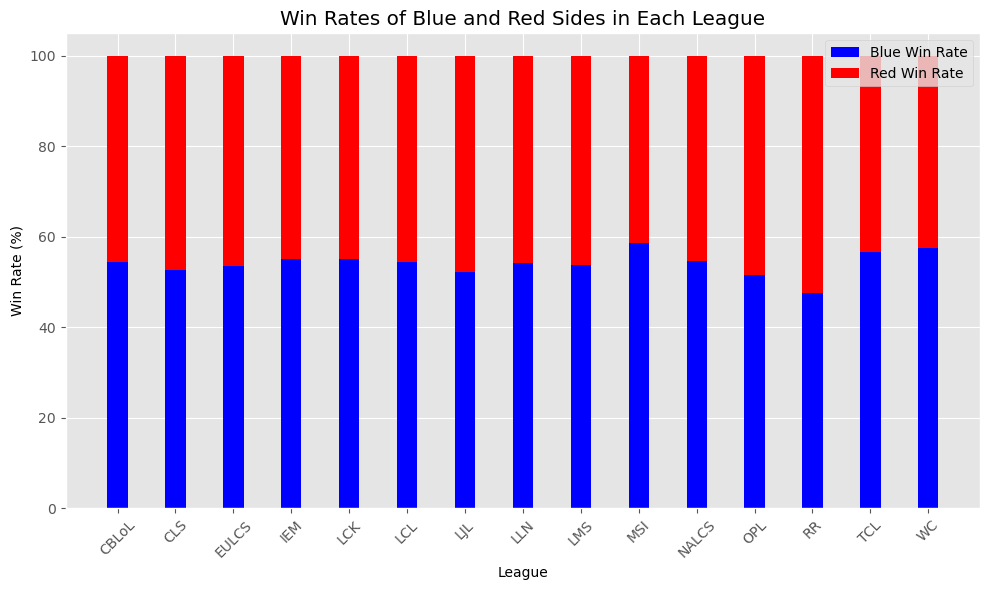

In [102]:
# Group the data by league
grouped_data = lol_data.groupby('League')

# Initialize lists to store win rates and league names
blue_win_rates = []
red_win_rates = []
leagues = []

# Iterate over each league
for league, group in grouped_data:
    # Calculate the win rate for each side (Red and Blue)
    blue_win_rate = (group['bResult'].sum() / len(group)) * 100
    red_win_rate = (group['rResult'].sum() / len(group)) * 100

    # Store the win rates and league names
    blue_win_rates.append(blue_win_rate)
    red_win_rates.append(red_win_rate)
    leagues.append(league)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
x = range(len(leagues))
width = 0.35
plt.bar(x, blue_win_rates, width, label='Blue Win Rate', color='blue')
plt.bar(x, red_win_rates, width, label='Red Win Rate', color='red', bottom=blue_win_rates)
plt.xticks(x, leagues, rotation=45)
plt.xlabel('League')
plt.ylabel('Win Rate (%)')
plt.title('Win Rates of Blue and Red Sides in Each League')
plt.legend()
plt.tight_layout()
plt.show()

In [103]:
# Group the data by league and year
grouped_data = lol_data.groupby(['League', 'Year'])

# Iterate over each league and year
for (league, year), group in grouped_data:
    # Calculate the win rate for each side (Red and Blue)
    blue_win_rate = (group['bResult'].sum() / len(group)) * 100
    red_win_rate = (group['rResult'].sum() / len(group)) * 100

    # Print the result for the current league and year
    print(f"In {league} {year}, the Blue side win rate: {blue_win_rate:.2f}% and the Red side win rate: {red_win_rate:.2f}% ")
    print()

In CBLoL 2016, the Blue side win rate: 55.48% and the Red side win rate: 44.52% 

In CBLoL 2017, the Blue side win rate: 52.21% and the Red side win rate: 47.79% 

In CBLoL 2018, the Blue side win rate: 63.16% and the Red side win rate: 36.84% 

In CLS 2017, the Blue side win rate: 50.90% and the Red side win rate: 49.10% 

In CLS 2018, the Blue side win rate: 87.50% and the Red side win rate: 12.50% 

In EULCS 2015, the Blue side win rate: 54.18% and the Red side win rate: 45.82% 

In EULCS 2016, the Blue side win rate: 53.07% and the Red side win rate: 46.93% 

In EULCS 2017, the Blue side win rate: 55.22% and the Red side win rate: 44.78% 

In EULCS 2018, the Blue side win rate: 37.50% and the Red side win rate: 62.50% 

In IEM 2015, the Blue side win rate: 51.06% and the Red side win rate: 48.94% 

In IEM 2016, the Blue side win rate: 61.54% and the Red side win rate: 38.46% 

In IEM 2017, the Blue side win rate: 46.15% and the Red side win rate: 53.85% 

In LCK 2015, the Blue side

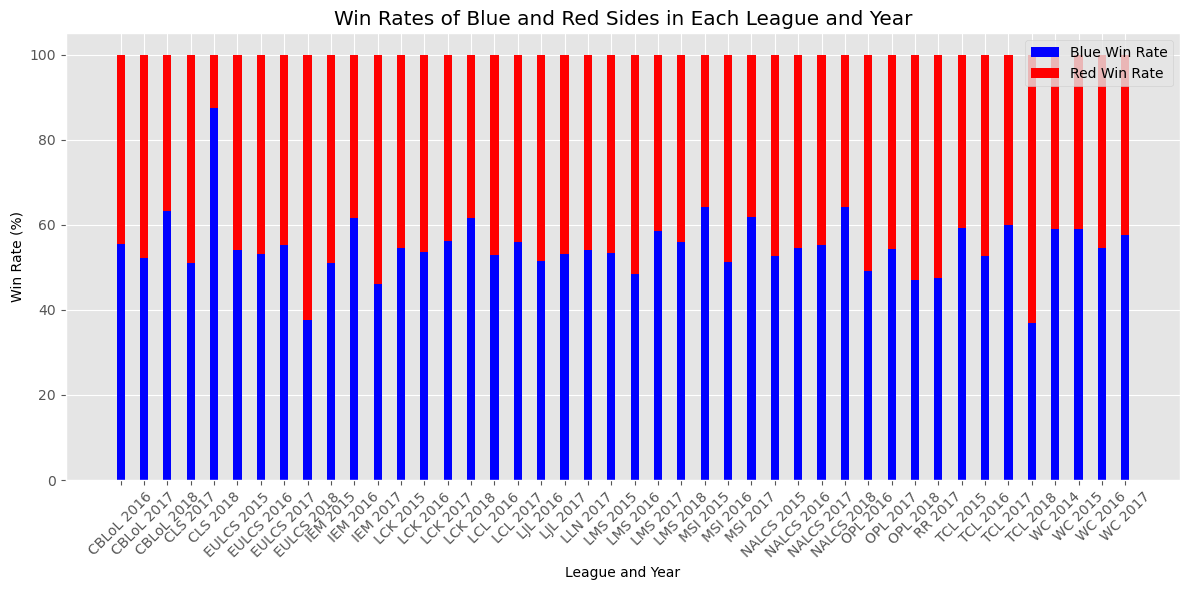

In [104]:
# Group the data by league and year
grouped_data = lol_data.groupby(['League', 'Year'])

# Initialize lists to store win rates, league names, and years
blue_win_rates = []
red_win_rates = []
leagues_years = []

# Iterate over each league and year
for (league, year), group in grouped_data:
    # Calculate the win rate for each side (Red and Blue)
    blue_win_rate = (group['bResult'].sum() / len(group)) * 100
    red_win_rate = (group['rResult'].sum() / len(group)) * 100

    # Store the win rates, league names, and years
    blue_win_rates.append(blue_win_rate)
    red_win_rates.append(red_win_rate)
    leagues_years.append(f"{league} {year}")

# Plotting the bar chart
plt.figure(figsize=(12, 6))
x = range(len(leagues_years))
width = 0.35
plt.bar(x, blue_win_rates, width, label='Blue Win Rate', color='blue')
plt.bar(x, red_win_rates, width, label='Red Win Rate', color='red', bottom=blue_win_rates)
plt.xticks(x, leagues_years, rotation=45)
plt.xlabel('League and Year')
plt.ylabel('Win Rate (%)')
plt.title('Win Rates of Blue and Red Sides in Each League and Year')
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
# Group the data by year and league
grouped_data = lol_data.groupby(['Year', 'League'])

# Get unique years and leagues
years = data['Year'].unique()
leagues = data['League'].unique()

# Set the number of subplots
num_years = len(years)
num_leagues = len(leagues)
fig, axes = plt.subplots(num_leagues, num_years, figsize=(12, 8), sharey=True)

# Iterate over each league
for i, league in enumerate(leagues):
    # Iterate over each year
    for j, year in enumerate(years):
        # Check if the group exists
        if (league, year) in grouped_data.groups:
            # Get the data for the current league and year
            league_data = grouped_data.get_group((league, year))
            # Get the data for the current year
            year_data = league_data[league_data['Year'] == year]

            # Calculate the win rate for each side (Red and Blue)
            blue_win_rate = (year_data['bResult'].sum() / len(year_data)) * 100
            red_win_rate = (year_data['rResult'].sum() / len(year_data)) * 100

            # Plot the bar chart
            ax = axes[i, j]
            ax.bar(['Blue', 'Red'], [blue_win_rate, red_win_rate], color=['blue', 'red'])
            ax.set_ylim(0, 100)
            ax.set_title(f'{league}\n{year}')
            
        else:
            print(f"No data found for league {league} in year {year}.")
            
# Set the common y-axis label
fig.text(0.04, 0.5, 'Win Rate (%)', va='center', rotation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()

KeyError: 'Year'

In [119]:
# Group the data by league and year
grouped_data = lol_data.groupby(['League', 'Year'])

# Get the unique league names
leagues = lol_data['League'].unique()

# Iterate over each league
for league in leagues:
    # Get the data for the current league
    league_data = grouped_data.get_group((league,))
    
    # Initialize lists to store win rates and years
    blue_win_rates = []
    red_win_rates = []
    years = []

    # Iterate over each year in the current league
    for year, group in league_data.groupby('Year'):
        # Calculate the win rate for each side (Red and Blue)
        blue_win_rate = (group['bResult'].sum() / len(group)) * 100
        red_win_rate = (group['rResult'].sum() / len(group)) * 100

        # Store the win rates and years
        blue_win_rates.append(blue_win_rate)
        red_win_rates.append(red_win_rate)
        years.append(year)

    # Plotting the bar chart for the current league
    plt.figure(figsize=(12, 6))
    x = range(len(years))
    width = 0.35
    plt.bar(x, blue_win_rates, width, label='Blue Win Rate', color='blue')
    plt.bar(x, red_win_rates, width, label='Red Win Rate', color='red', bottom=blue_win_rates)
    plt.xticks(x, years)
    plt.xlabel('Year')
    plt.ylabel('Win Rate (%)')
    plt.title(f'Win Rates of Blue and Red Sides in {league}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

ValueError: must supply a same-length tuple to get_group with multiple grouping keys

### Dragões feitos por cada um dos lados

In [109]:
# Calculate the total number of dragons made by the Red side and Blue side
total_dragons_red = lol_data['rDragons'].sum()
total_dragons_blue = lol_data['bDragons'].sum()

# Plotting the bar graph
dragons = ['Red Side', 'Blue Side']
total_dragons = [total_dragons_red, total_dragons_blue]

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(dragons, total_dragons)
plt.xlabel('Side')
plt.ylabel('Total Dragons Taken')
plt.title('Comparison of Dragons Taken by Red Side and Blue Side')
plt.show()

ValueError: Image size of 2371867x548 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x600 with 1 Axes>

### Numero de barons para cada side

In [113]:
# Calculate the total number of barons taken by the Red side and Blue side
total_barons_red = lol_data['rBarons'].sum()
total_barons_blue = lol_data['bBarons'].sum()

# Calculate the total number of barons across all leagues
total_barons = total_barons_red + total_barons_blue

# Print the number of barons for each side
print("Total Barons taken by the Red side:", total_barons_red)
print("Total Barons taken by the Blue side:", total_barons_blue)

# Print the total number of barons across all leagues
print("Total Barons taken across all leagues:", total_barons)

Total Barons taken by the Red side: [[29.954]][][][][][][][][[32.145]][][][[39.788]][][[27.243]][][][[36.139], [26.788]][][[31.408]][[36.047]][[45.521], [37.223]][][[24.043], [31.495]][][[29.689], [22.163]][][][[24.5], [32.215]][][][[35.832]][][[22.956]][[31.425], [24.052]][[32.863], [24.831], [40.826]][][[29.412]][][][][][[43.817]][][[28.958]][][][][[30.634], [40.129]][[28.14]][][[26.981]][[47.364], [39.802]][][][][][][][[50.741], [33.806]][][[39.921]][[29.908]][][[29.447]][[34.978]][][][[22.501]][][][[29.697]][[29.348], [21.144]][[21.002], [31.718]][[23.968]][[34.296], [43.765]][[36.53], [29.223]][][[27.127]][][[20.527], [28.279]][[27.946]][][][[24.784], [33.376]][[31.606], [38.903]][][[24.514]][[27.614]][][[30.003]][][][][[35.374], [42.742], [28.017]][][[23.367], [30.847]][][][][[35.301]][][[39.091]][[21.471], [28.717]][[25.452]][][[24.754], [32.698]][[38.29]][[26.713], [34.842]][[25.883]][[38.624]][[24.206], [35.987], [45.055]][[33.307], [41.161]][[30.038], [37.255]][[30.665], [37.

### Campeões mais pickados em cada um dos sides

In [115]:
# Create a dictionary to store the most picked champion for each role on each side
most_picked_champions = {'Red': {}, 'Blue': {}}

# Define the column names for each role and side
column_names = {
    'Top': {'Blue': 'blueTopChamp', 'Red': 'redTopChamp'},
    'Jungle': {'Blue': 'blueJungleChamp', 'Red': 'redJungleChamp'},
    'Mid': {'Blue': 'blueMiddleChamp', 'Red': 'redMiddleChamp'},
    'ADC': {'Blue': 'blueADCChamp', 'Red': 'redADCChamp'},
    'Support': {'Blue': 'blueSupportChamp', 'Red': 'redSupportChamp'}
}

# Iterate over each role
for role, columns in column_names.items():
    # Iterate over each side
    for side in ['Red', 'Blue']:
        # Get the most picked champion for the role and side
        most_picked_champion = lol_data[columns[side]].mode().values[0]
        
        # Get the count of the most picked champion
        count = lol_data[lol_data[columns[side]] == most_picked_champion][columns[side]].count()
        
        # Store the most picked champion and its count in the dictionary
        most_picked_champions[side][role] = {'Champion': most_picked_champion, 'Count': count}

# Print the most picked champion for each role on each side
for side in ['Red', 'Blue']:
    print(f"Most Picked Champions for the {side} Side:")
    for role in column_names.keys():
        champion = most_picked_champions[side][role]['Champion']
        count = most_picked_champions[side][role]['Count']
        print(f"{role}: {champion} (Count: {count})")
    print()

Most Picked Champions for the Red Side:
Top: Maokai (Count: 880)
Jungle: RekSai (Count: 1199)
Mid: Orianna (Count: 671)
ADC: Sivir (Count: 888)
Support: Braum (Count: 1036)

Most Picked Champions for the Blue Side:
Top: Maokai (Count: 827)
Jungle: RekSai (Count: 1123)
Mid: Orianna (Count: 643)
ADC: Lucian (Count: 797)
Support: Braum (Count: 1079)



In [116]:
# Create a dictionary to store the top 3 most picked champions for each role on each side
top_picked_champions = {'Red': {}, 'Blue': {}}

# Define the column names for each role and side
column_names = {
    'Top': {'Blue': 'blueTopChamp', 'Red': 'redTopChamp'},
    'Jungle': {'Blue': 'blueJungleChamp', 'Red': 'redJungleChamp'},
    'Mid': {'Blue': 'blueMiddleChamp', 'Red': 'redMiddleChamp'},
    'ADC': {'Blue': 'blueADCChamp', 'Red': 'redADCChamp'},
    'Support': {'Blue': 'blueSupportChamp', 'Red': 'redSupportChamp'}
}

# Iterate over each role
for role, columns in column_names.items():
    # Iterate over each side
    for side in ['Red', 'Blue']:
        # Get the most picked champions for the role and side
        picked_champions = lol_data[columns[side]].value_counts().head(3)
        
        # Store the most picked champions and their counts in the dictionary
        top_picked_champions[side][role] = picked_champions

# Print the top 3 most picked champions for each role on each side
for side in ['Red', 'Blue']:
    print(f"Top 3 Most Picked Champions for the {side} Side:")
    for role in column_names.keys():
        champions = top_picked_champions[side][role]
        print(f"{role}:")
        for champion, count in champions.items():
            print(f"- {champion} (Count: {count})")
    print()

Top 3 Most Picked Champions for the Red Side:
Top:
- Maokai (Count: 880)
- Gnar (Count: 665)
- Shen (Count: 604)
Jungle:
- RekSai (Count: 1199)
- Gragas (Count: 1104)
- Elise (Count: 995)
Mid:
- Orianna (Count: 671)
- Viktor (Count: 604)
- Corki (Count: 518)
ADC:
- Sivir (Count: 888)
- Ashe (Count: 814)
- Lucian (Count: 798)
Support:
- Braum (Count: 1036)
- Thresh (Count: 968)
- Alistar (Count: 856)

Top 3 Most Picked Champions for the Blue Side:
Top:
- Maokai (Count: 827)
- Shen (Count: 657)
- Gnar (Count: 625)
Jungle:
- RekSai (Count: 1123)
- Elise (Count: 1065)
- Gragas (Count: 990)
Mid:
- Orianna (Count: 643)
- Viktor (Count: 621)
- Syndra (Count: 526)
ADC:
- Lucian (Count: 797)
- Sivir (Count: 794)
- Ashe (Count: 754)
Support:
- Braum (Count: 1079)
- Thresh (Count: 953)
- Alistar (Count: 765)



### Campeões priorizados no pick em cada um dos sides

In [117]:
# Create a dictionary to store the top 5 champions picked first for each side
top_picked_first_champions = {'Red': [], 'Blue': []}

# Get the column names for the first champion picked
column_names = {
    'Blue': 'blueBans',
    'Red': 'redBans'
}

# Iterate over each side
for side in ['Red', 'Blue']:
    # Get the bans for the side
    bans = lol_data[column_names[side]].str.split(',').apply(lambda x: x[0].strip())
    
    # Count the frequency of each champion
    champion_counts = bans.value_counts().head(5)
    
    # Store the top picked first champions for the side
    top_picked_first_champions[side] = list(champion_counts.index)

# Print the top 5 champions picked first for each side
for side in ['Red', 'Blue']:
    print(f"Top 5 Champions Picked First for {side} Side:")
    for champion in top_picked_first_champions[side]:
        print(f"- {champion}")
    print()

Top 5 Champions Picked First for Red Side:
- ['Zac'
- ['Kalista'
- ['Leblanc'
- ['Nidalee'
- ['Ryze'

Top 5 Champions Picked First for Blue Side:
- ['Leblanc'
- ['Shen'
- ['Malzahar'
- ['Nidalee'
- ['Ryze'

